In [11]:
import pandas as pd

file_path = 'GooglePlaystore.xlsx'
data = pd.read_excel(file_path)

In [12]:

data = data[data['Reviews'] != '3.0M']

data[data['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
#Task 2
initial_shape = data.shape
data = data[~data.apply(lambda x: x.astype(str).str.contains('Varies with device').any(), axis=1)]
final_shape = data.shape

initial_shape, final_shape

((10840, 13), (9059, 13))

In [14]:
#Preprocessing

In [15]:
import pandas as pd
import re
import numpy as np

def normalize_android_ver(version):
    if pd.isna(version):
        return version
    version = re.sub(r'[^\d\.]', '', version)
    version = version.split(' and')[0]
    version = version.split(' -')[0]
    parts = version.split('.')
    return float('.'.join(parts[:2])) if len(parts) > 1 else float(parts[0])

file_path = 'GooglePlaystore.xlsx'
data = pd.read_excel(file_path)

data = data[data['Reviews'] != '3.0M']
data = data[~data.apply(lambda x: x.astype(str).str.contains('Varies with device').any(), axis=1)]
data['Android Ver'] = data['Android Ver'].apply(normalize_android_ver)
data['Installs'] = data['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))

category_means = data.groupby('Category')['Rating'].mean().round(2).to_dict()
def fill_rating(row):
    if pd.isna(row['Rating']):
        return category_means.get(row['Category'], np.nan)
    return row['Rating']
data['Rating'] = data.apply(fill_rating, axis=1)

def convert_size(size):
    if 'M' in size:
        return int(float(size.replace('M', '')) * 1000000)
    elif 'K' in size:
        return int(float(size.replace('K', '')) * 1000)
    return None
data['Size'] = data['Size'].apply(convert_size)
data.dropna(subset=['Size', 'Installs'], inplace=True)

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3


In [16]:
#Analysis part 1

category_rating_stats = data.groupby('Category')['Rating'].describe()
category_rating_stats


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.358689,0.359182,3.2,4.100,4.400,4.70,5.0
AUTO_AND_VEHICLES,72.0,4.149306,0.527984,2.1,4.000,4.175,4.50,4.9
BEAUTY,47.0,4.291489,0.327958,3.1,4.100,4.290,4.50,4.9
BOOKS_AND_REFERENCE,189.0,4.316190,0.395854,2.7,4.200,4.320,4.60,5.0
BUSINESS,388.0,4.132526,0.516272,1.0,4.120,4.120,4.40,5.0
COMICS,48.0,4.160417,0.554858,2.8,3.775,4.400,4.60,5.0
COMMUNICATION,234.0,4.101709,0.461381,1.0,4.025,4.100,4.30,5.0
DATING,211.0,3.958199,0.602859,1.0,3.800,4.000,4.30,5.0
EDUCATION,108.0,4.397130,0.253742,3.5,4.300,4.400,4.60,4.9


In [17]:
#Analysis part 2
free_apps = data[data['Type'] == 'Free']

In [18]:
def top_three_free_apps(df, column):
    return df.sort_values(by=column, ascending=False).groupby('Category').head(3)[['Category', 'App', column]]

#'Rating'
top_rated_free_apps = top_three_free_apps(free_apps, 'Rating')

#'Installs'
top_installed_free_apps = top_three_free_apps(free_apps, 'Installs')

#'Reviews'
top_reviewed_free_apps = top_three_free_apps(free_apps, 'Reviews')

top_rated_free_apps, top_installed_free_apps, top_reviewed_free_apps

(                  Category                                                App  \
 9178           PHOTOGRAPHY                                            i am EB   
 6171      TRAVEL_AND_LOCAL                                           BG Guide   
 10297               FAMILY                                      Story Time FD   
 10301              FINANCE  FD Calculator (EMI, SIP, RD & Loan Eligilibility)   
 10326            LIFESTYLE                          Comunidad De Fe Minitries   
 ...                    ...                                                ...   
 9944   MAPS_AND_NAVIGATION                                          PlugShare   
 1524    LIBRARIES_AND_DEMO                                      Call Recorder   
 882          ENTERTAINMENT   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍   
 991          ENTERTAINMENT                     ColorFul - Adult Coloring Book   
 863          ENTERTAINMENT                         Motorola Spotlight Player™   
 
        Rating

In [20]:
#Analysis part 3
print(data['Price'].dtype)

data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '')).astype(float)

paid_apps = data[data['Type'] == 'Paid']
average_price = paid_apps['Price'].mean()
max_price = paid_apps['Price'].max()
min_price = paid_apps['Price'].min()

average_price, max_price, min_price

object


(15.65346687211094, 400.0, 0.99)

In [21]:
# Visualization

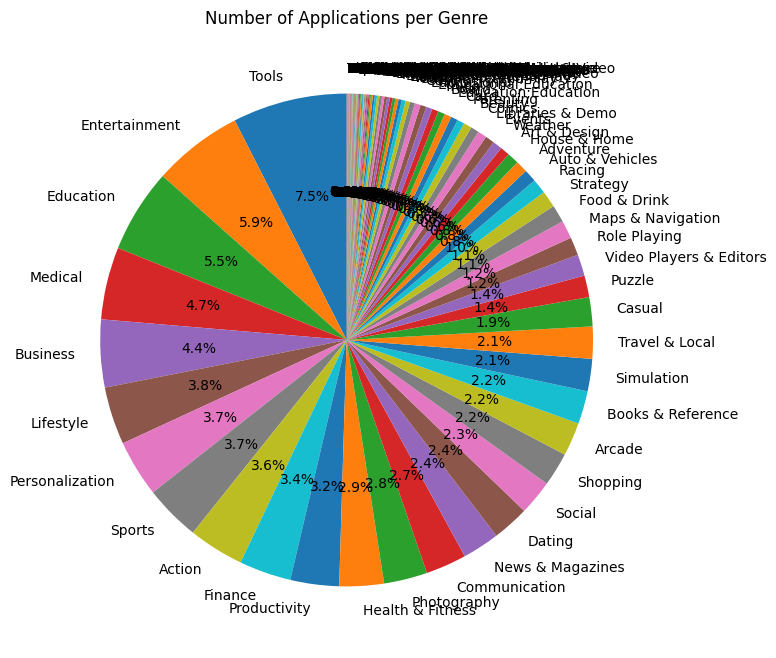

In [23]:
#part 1
import pandas as pd
import matplotlib.pyplot as plt

data['Genres'] = data['Genres'].apply(lambda x: x.split('; '))

genre_data = data.explode('Genres')

genre_counts = genre_data['Genres'].value_counts()

plt.figure(figsize=(10, 8))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Number of Applications per Genre')
plt.ylabel('')  # Hide the y-label as it's not necessary here
plt.show()

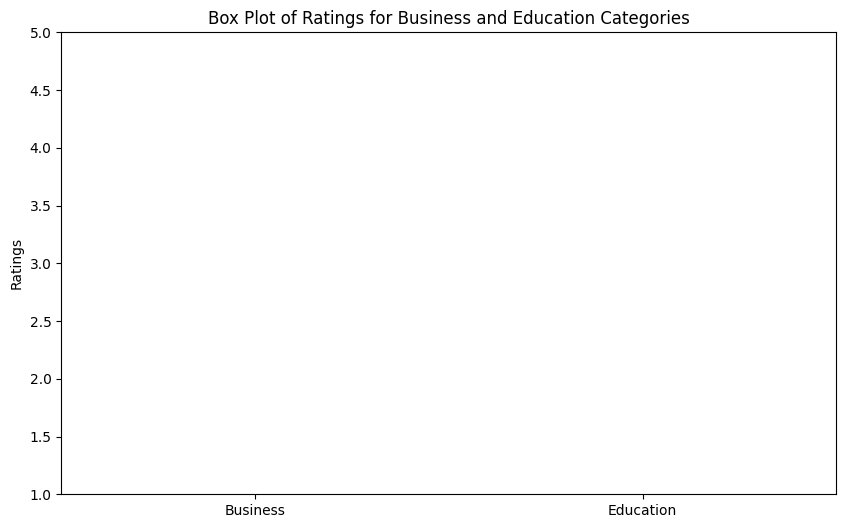

In [25]:
#part 2
business_ratings = data[data['Category'] == 'Business']['Rating']
education_ratings = data[data['Category'] == 'Education']['Rating']
plt.figure(figsize=(10, 6))
plt.boxplot([business_ratings.dropna(), education_ratings.dropna()], labels=['Business', 'Education'])
plt.title('Box Plot of Ratings for Business and Education Categories')
plt.ylabel('Ratings')
plt.ylim(1, 5)  # Set the limits of the y-axis to match the rating scale
plt.show()